In [0]:
# 코랩으로 돌리면 이거 실행하기 (코랩만)

# !apt-get update

# !apt-get install g++ openjdk-8-jdk python-dev python3-dev

# !pip3 install JPype1-py3

# !pip3 install konlpy

# !JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt, Kkma

In [8]:
train_data = pd.read_csv('result_1_1000.csv', sep=",", encoding='utf-8')  # 파일 이름 바꾸기, 파일&코드 위치에 있기
train_data.head(10)

,score,review
0,10,"최고의 영화, 정말 감동입니다"
1,10,오랜만에 좋은 영화봤네요
2,10,다 보고 박수 쳤습니다.
3,10,평점낮을이유전혀없어요.. 재미있게 잘봤습니다.
4,10,와 넷플릭스 요즘 영화 정말 잘 만든다. 최고~~!!
5,1,평점이 9.5 실화냐? 미친 눈깔이 쳐 뼈뿐나?
6,10,마지막 장면을 위해서 보는 영화. 처음엔 진지가 무섭고 싫었는데
7,5,솔직히 이거도 OO같은영화는 맞는데 최근에나온 라이즈오즈스카이워커인지 설정파괴 스카...
8,10,민주화운동 영화 중에서 제일 웰메이드로 만든거 같다 모든 아시아국들이 봤으면 좋겠다...
9,9,영화에서 현실성을 따지는 사람은 대체 뭘까?


In [0]:
train_data = train_data.dropna(how='any')

In [0]:
# label
def labeling(x):
    if x >= 7:
        x = 1
    elif x <= 4:
        x = 0
    else:
        x = None
    return x

train_data['score'] = train_data['score'].apply(labeling)

In [11]:
train_data = train_data.dropna(how='any')
train_data

,score,review
0,1.0,"최고의 영화, 정말 감동입니다"
1,1.0,오랜만에 좋은 영화봤네요
2,1.0,다 보고 박수 쳤습니다.
3,1.0,평점낮을이유전혀없어요.. 재미있게 잘봤습니다.
4,1.0,와 넷플릭스 요즘 영화 정말 잘 만든다. 최고~~!!
...,...,...
9994,0.0,음...스토리풀게 ㅈㄹ많을 것 같았는데 영화시간이 10분남은걸보고 망작의 스멜이 났...
9995,0.0,파수꾼배우들! 기대하는 마음 티비켰는데 리얼 남는건 실망뿐... 아 이게 무슨 얘기...
9996,1.0,진짜 먹먹해지는 영화 ㅠ 쓰다만 데이브의 이름이 미치도록 짠하고 우울하다 ㅠ 명작
9997,1.0,"난 재밌게 봤다.존윅 개봉 당시 재밌다고 추천 도 하고 했는데 ,사실 존윅 2보면 ..."


In [0]:
train_data['score'] = pd.to_numeric(train_data['score'], downcast='integer')

In [13]:
train_data['score'].value_counts()

1    5676
0    2564
Name: score, dtype: int64

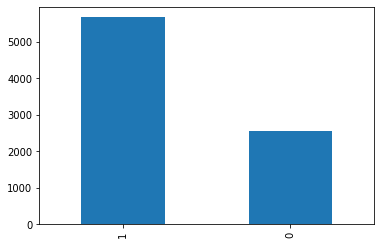

In [14]:
train_data['score'].value_counts().plot(kind='bar')

In [15]:
train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힇]", "")
train_data

,score,review
0,1,최고의영화정말감동입니다
1,1,오랜만에좋은영화봤네요
2,1,다보고박수쳤습니다
3,1,평점낮을이유전혀없어요재미있게잘봤습니다
4,1,와넷플릭스요즘영화정말잘만든다최고
...,...,...
9994,0,음스토리풀게ㅈㄹ많을것같았는데영화시간이분남은걸보고망작의스멜이났다편이나오지않고서야이건뭔...
9995,0,파수꾼배우들기대하는마음티비켰는데리얼남는건실망뿐아이게무슨얘기임대쳌ㅋㅋ
9996,1,진짜먹먹해지는영화ㅠ쓰다만데이브의이름이미치도록짠하고우울하다ㅠ명작
9997,1,난재밌게봤다존윅개봉당시재밌다고추천도하고했는데사실존윅보면총검술이무용같지않냐예전중국영화...


In [16]:
train_data['review'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

score      0
review    52
dtype: int64

In [0]:
train_data = train_data.dropna(how='any')

In [18]:
train_data.isnull().sum()

score     0
review    0
dtype: int64

# 이거 전까지 돌려서 아래 stopword 고치기!!
<br>
## stopwords -> 한국어의 조사와 같이 의미가 없을 것 같은 단어 목록 <br>
- 여기에 추가하고 나서 아래 코드 고치기!! <br>
- stopwords=[여기에 적어오기]

In [0]:
# stopwords -> 한국어의 조사, 은,는,이,가,을,를,잘,도...
# stopwords=['의','가','이','는','은','들','잘','좀','과','도','을','를','으로','한','하다','에']

# 여기 아래는 건들지 맙시다~~

In [0]:
# # 불용어 제거, 형태소 토큰화 작업
# okt = Okt() 

# X_train = []
# for sentence in train_data['review']:
#     temp_x = []
#     temp_x = okt.morphs(sentence, stem=True) # Tokenizing
#     temp_x = [word for word in temp_x if not word in stopwords] # 불용어
#     X_train.append(temp_x)
# print(X_train[:5])

In [0]:
# kkma = Kkma()
# X_train = []
# for sentence in train_data['review']:
#     temp_x = []
#     temp_x = kkma.morphs(sentence) # Tokenizing
#     X_train.append(temp_x)
# print(X_train[:5])

# 불용어 작업이 된 파일을 불러오고 싶을 때

In [0]:
import pickle

# with open("X_train.txt", "wb") as fp:   #Pickling
#     pickle.dump(X_train, fp)

with open("X_train_kkma.txt", "rb") as fp:   # Unpickling
    X_train = pickle.load(fp)
    

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'이': 1, '하': 2, '는': 3, 'ㄴ': 4, '고': 5, '영화': 6, '었': 7, '보': 8, '다': 9, '을': 10, '은': 11, '에': 12, 'ㄹ': 13, '어': 14, '가': 15, '의': 16, '도': 17, '들': 18, '았': 19, '게': 20, '것': 21, '를': 22, '있': 23, '지': 24, '아': 25, '좋': 26, '없': 27, '는데': 28, '나': 29, '되': 30, '으로': 31, '음': 32, '너무': 33, '스토리': 34, 'ㅁ': 35, '로': 36, '에서': 37, '같': 38, '연기': 39, '어서': 40, '더': 41, '배우': 42, '만': 43, 'ㅂ니다': 44, '재밌': 45, '거': 46, '지만': 47, '진짜': 48, '수': 49, '어요': 50, '아니': 51, '긴장감': 52, '않': 53, '그': 54, '습니다': 55, '면': 56, '과': 57, '생각': 58, '네요': 59, '주': 60, 'ㄴ다': 61, '평점': 62, '기': 63, '네': 64, '만들': 65, '안': 66, '시간': 67, '나오': 68, '라': 69, '겠': 70, '잘': 71, '니': 72, '사람': 73, '때': 74, '알': 75, '까지': 76, '싶': 77, '정말': 78, '그냥': 79, '왜': 80, '액션': 81, '연출': 82, '감독': 83, '오': 84, '와': 85, 'ㄴ데': 86, '면서': 87, '아서': 88, '점': 89, '듯': 90, '말': 91, '최고': 92, '보다': 93, '으면': 94, '서': 95, 'ㄴ지': 96, '기대': 97, '넷': 98, '분': 99, '많': 100, '정도': 101, '모르': 102, '저': 103, '요': 104, '잼': 105, '냐': 106, '한

In [0]:
# token_size or vector_size
threshold = 3 # 빈도수
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0 # 빈도수가 threshold보다 작은 단어수
total_freq = 0 # 훈련 data 전체 단어 빈도수 총 합
rate_freq = 0 # 빈도수가 threshold보다 작은 단어들의 총 합

# 단어와 빈도수의 pair를 key, value로 처리
for key, value in tokenizer.word_index.items():
    total_freq = total_freq + value
    # 단어 빈도수가 threschold 보다 작은 값 처리
    if (value < threshold):
        rare_cnt += 1
        rate_freq += value

In [25]:
print('총 단어 수(Vocabulary):', total_cnt)
print('빈도수 낮은 수:', rare_cnt)
print('단어 집합에서 빈도수가 낮은 단어 비율:', 
      ((rare_cnt / total_cnt) * 100))
print('전체 출현 단어에서 빈도수가 낮은 단어 비율:',
      ((rate_freq / total_freq) * 100))

# 전체 단어 수 중 빈도수가 2이하인 단어 제거, 
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기:', vocab_size)

총 단어 수(Vocabulary): 13284
빈도수 낮은 수: 2
단어 집합에서 빈도수가 낮은 단어 비율: 0.015055706112616682
전체 출현 단어에서 빈도수가 낮은 단어 비율: 3.3998583619006432e-06
단어 집합의 크기: 13283


In [26]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
print(X_train[:3]) #[[150, 12, 434, 5, 454, ...]]

[[92, 16, 6, 78, 205, 1, 44], [328, 12, 26, 11, 6, 8, 19, 59], [9, 8, 5, 4152, 7, 55]]


In [0]:
Y_train = np.array(train_data['score']) 

최대: 554
평균: 33.148143624816804


Text(0, 0.5, 'number of samples')

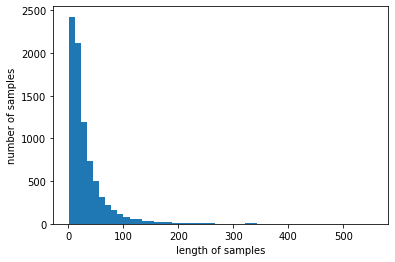

In [28]:
# 패딩 처리
# 최대 리뷰 길이, 평균 리뷰 길이 구하기
max_review_length = max(len(x) for x in X_train)
print("최대:", max_review_length)
mean_review_length = sum(map(len, X_train)) / len(X_train)
print("평균:", mean_review_length)


plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

In [0]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [30]:
max_len = 100
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 95.17586712261846


In [0]:
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length)

# LSTM을 이용한 리뷰 모델 생성

In [0]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Input
from tensorflow.keras.models import Model
# EarlyStopping : 지정 epochs 횟수 전에 과적합의 모습을 보이면 멈추게 함
# ModelCheckpoint : 이전 모델보다 성능이 좋을 때만 저장한다.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
# T = X_train.shape[1] # 30
# i = Input(shape=(T,))
# x = Embedding(vocab_size, 100)(i) 
# x = LSTM(128)(x)
# x = Dense(1, activation='sigmoid')(x)
# model = Model(i, x)
# model.summary()


def create_model(embedding_size = 100, LSTM_node=128, optimizer='adam'):
  T = X_train.shape[1] # 0
  i = Input(shape=(T,))
  x = Embedding(vocab_size, embedding_size)(i) 
  x = LSTM(LSTM_node)(x)
  x = Dense(1, activation='sigmoid')(x)
  model = Model(i, x)
  model.compile(loss='binary_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
  print(f"embedding_size = {embedding_size}, LSTM_node={LSTM_node}, optimizer={optimizer}")
  # model.summary()
  return model

In [0]:
eStop = EarlyStopping(monitor='val_loss',
                      mode='min',
                      verbose = 1, # log 찍기
                      patience=5) # 5번 연속 떨어지면 멈춤

mCheck = ModelCheckpoint('best_model.h5',
                        monitor='val_acc',
                        mode='max',
                        verbose=1,
                        save_best_only=True)

In [0]:
eStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mCheck = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', 
                     verbose=1, save_best_only=True)

In [0]:
X_test = X_train[:100 , :]
X_train_real = X_train[100:, :]

In [0]:
Y_test = Y_train[:100]
Y_train_real = Y_train[100:]

In [0]:
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
# model = KerasClassifier(build_fn=create_model, verbose=1)
# param_grid ={
#     'embedding_size' : [150],
#     'LSTM_node' : [128],
#     'optimizer' :["adam"], 
#     'batch_size' : [10],
#     'epochs' : [3, 5]
# }
# grid= GridSearchCV(estimator=model,
#                    param_grid=param_grid,cv=3)
# fit = grid.fit(X_train, Y_train, verbose=2, validation_data=(X_test, Y_test))
# print("="*30)
# print(grid.best_score_)
# print(grid.best_params_)

# # , callbacks=[eStop, mCheck]

0.8109421730041504


grid.best_params_= {'LSTM_node': 128, 'batch_size': 10, 'embedding_size': 150, 'epochs': 5, 'optimizer': 'adam'}

In [0]:
# best_params = {'LSTM_node': 128, 'batch_size': 10, 'embedding_size': 150, 'epochs': 5, 'optimizer': 'adam'}
best_params = {'LSTM_node': 128, 'batch_size': 10, 'embedding_size': 150, 'epochs': 5, 'optimizer': 'adam'}

In [80]:
model = create_model(embedding_size=best_params['embedding_size'], LSTM_node=best_params['LSTM_node'], optimizer='adam')

r=model.fit(X_train, Y_train, verbose=2, validation_data=(X_test, Y_test), 
          epochs=best_params['epochs'], batch_size=best_params['batch_size'],callbacks=[eStop, mCheck])

embedding_size = 150, LSTM_node=128, optimizer=adam
Epoch 1/5
819/819 - 57s - loss: 0.4543 - accuracy: 0.7920 - val_loss: 0.1875 - val_accuracy: 0.9700
Epoch 2/5
819/819 - 56s - loss: 0.2596 - accuracy: 0.8974 - val_loss: 0.1061 - val_accuracy: 0.9700
Epoch 3/5
819/819 - 54s - loss: 0.1861 - accuracy: 0.9320 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 4/5
819/819 - 55s - loss: 0.1241 - accuracy: 0.9544 - val_loss: 0.0370 - val_accuracy: 0.9900
Epoch 5/5
819/819 - 53s - loss: 0.1069 - accuracy: 0.9624 - val_loss: 0.0418 - val_accuracy: 1.0000


In [0]:
# model = create_model(embedding_size=grid.best_params_['embedding_size'], LSTM_node=grid.best_params_['LSTM_node'], optimizer='adam')

# r=model.fit(X_train, Y_train, verbose=2, validation_data=(X_test, Y_test), 
#           epochs=grid.best_params_['epochs'], batch_size=grid.best_params_['batch_size'])

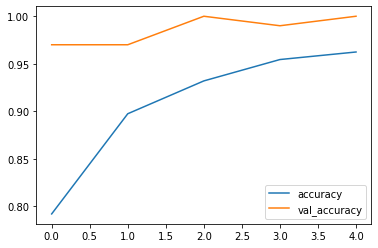

In [82]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [83]:
y_pred  = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

# y_pred
loss, acc =model.evaluate(X_test, Y_test, batch_size=10)

10/10 [==============================] - 0s 16ms/step - loss: 0.0418 - accuracy: 1.0000


In [0]:
model.save('my_model_ep5.h5')

# 가장 성능이 좋았던 모델 불러와서 실행시키자

In [0]:
import tensorflow as tf
my_model = tf.keras.models.load_model('my_model_ep10.h5')

In [103]:
# X_val = X_train[-100:]
# Y_val = Y_train[-100:]
y_pred  = my_model.predict(X_test)
y_pred  = my_model.predict(X_val)
y_pred = np.where(y_pred >= 0.5, 1, 0)
# print(y_pred)
# y_pred
loss, acc =my_model.evaluate(X_test, Y_test)
# loss, acc =my_model.evaluate(X_val, Y_val)
print(f"loss:{loss}, acc:{acc}")

4/4 [==============================] - 0s 15ms/step - loss: 0.0136 - accuracy: 1.0000
loss:0.013631561771035194, acc:1.0


In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score

# print(confusion_matrix(Y_test, y_pred))
# accuracy_score(Y_test, y_pred)

print(confusion_matrix(Y_val, y_pred))
accuracy_score(Y_val, y_pred)



[[33  0]
 [ 1 66]]


0.99